### Discrete Datasets
##### 28Nov18
Now I want to look at a discrete dataset [Mocosko, _et. al._ 2015](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE63473) and see if my comparisons hold true.  
I will also try to feature select with NVR, which is designed for continuous data.

In [1]:
from fcc_DRs import *
from fcc_utils import *

Using TensorFlow backend.


In [2]:
# read in discrete dataset
%time P14retina_7 = counts_table(datafile='inputs/GSM1626799_P14Retina_7.digital_expression.txt.gz', cells_axis=1)

CPU times: user 10.7 s, sys: 954 ms, total: 11.7 s
Wall time: 11.7 s


In [3]:
P14retina_7.data.shape

(4000, 20105)

4000 cells, 20105 genes

In [ ]:
%time P14retina_7_PCA = fcc_PCA(P14retina_7.arcsinh_norm(), n_components=100) # create PCA object with 100 components

In [ ]:
P14retina_7_PCA.plot()

In [ ]:
%time P14retina_7_tSNE = fcc_tSNE(P14retina_7_PCA.results, perplexity=30) # perform tSNE on 100-component PCA results

In [ ]:
P14retina_7_tSNE.plot()

In [ ]:
P14retina_7_tSNE.clu.draw_decision_graph() # look at potential cluster centers

In [ ]:
# assign cluster centers and visualize
P14retina_7_tSNE.clu.assign(25,10)
P14retina_7_tSNE.clu.draw_decision_graph(min_delta=P14retina_7_tSNE.clu.min_delta, min_density=P14retina_7_tSNE.clu.min_density)

In [ ]:
# show clustering and silhouette score
P14retina_7_tSNE.plot_clusters()

In [ ]:
P14retina_7_tSNE.silhouette_score

In [ ]:
%time P14retina_7_UMAP = fcc_UMAP(P14retina_7_PCA.results, perplexity=30) # perform UMAP on 100-component PCA results

In [ ]:
P14retina_7_UMAP.plot()

In [ ]:
P14retina_7_UMAP.clu.draw_decision_graph() # look at potential cluster centers

In [ ]:
# assign cluster centers and visualize
P14retina_7_UMAP.clu.assign(25,2.5)
P14retina_7_UMAP.clu.draw_decision_graph(min_delta=P14retina_7_UMAP.clu.min_delta, min_density=P14retina_7_UMAP.clu.min_density)

In [ ]:
# show clustering
P14retina_7_UMAP.plot_clusters()

In [ ]:
P14retina_7_UMAP.silhouette_score

Let's try priming with DCA for this data

In [4]:
%time P14retina_7_DCA = fcc_DCA(P14retina_7.data)

DCA: Successfully preprocessed 19280 genes and 4000 cells.
Calculating low dimensional representations...
Calculating reconstructions...
CPU times: user 24min 52s, sys: 4min 35s, total: 29min 27s
Wall time: 15min 19s


In [5]:
%time P14retina_7_DCA_tSNE = fcc_tSNE(P14retina_7_DCA.results, perplexity=30) # perform tSNE on DCA results

CPU times: user 5min 51s, sys: 4.85 s, total: 5min 55s
Wall time: 6min


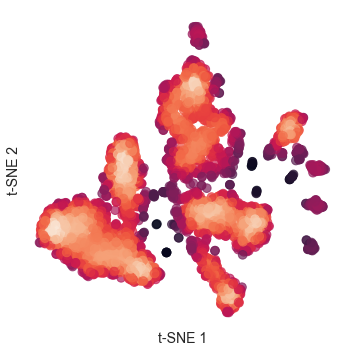

In [6]:
P14retina_7_DCA_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1289bda90>)

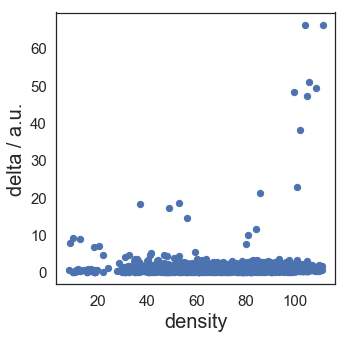

In [7]:
P14retina_7_DCA_tSNE.clu.draw_decision_graph() # look at potential cluster centers

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1269b0ac8>)

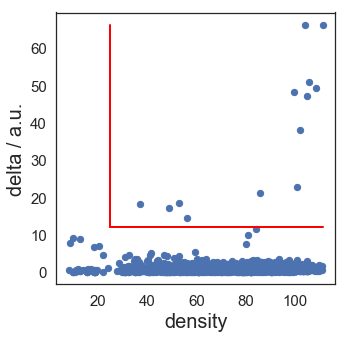

In [9]:
# assign cluster centers and visualize
P14retina_7_DCA_tSNE.clu.assign(25,12)
P14retina_7_DCA_tSNE.clu.draw_decision_graph(min_delta=P14retina_7_DCA_tSNE.clu.min_delta, min_density=P14retina_7_DCA_tSNE.clu.min_density)

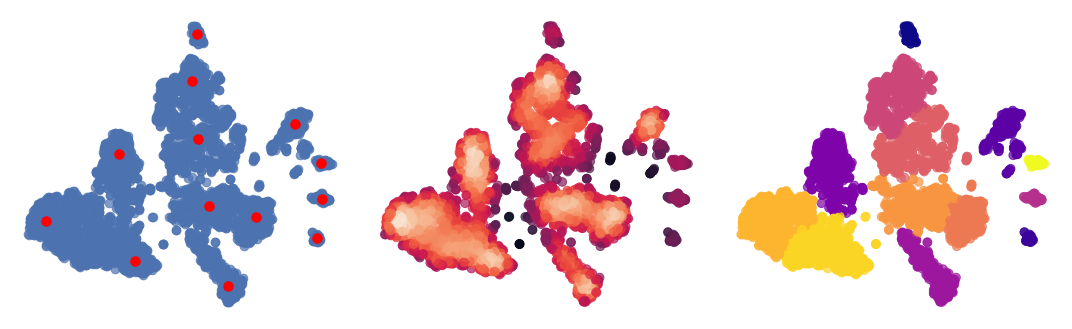

In [10]:
# show clustering and silhouette score
P14retina_7_DCA_tSNE.plot_clusters()

In [11]:
P14retina_7_DCA_tSNE.silhouette_score

0.46197486

---
Try NVR feature selection on raw data

In [12]:
import nvr

In [ ]:
hqGenes=nvr.parseNoise(P14retina_7.data.as_matrix())
dHq=nvr.mkIndexedArr(P14retina_7.data.as_matrix(),hqGenes)
dHq.shape

So I think this eliminated ~6000 "noisy" genes (lots of zeros?)

In [ ]:
dataHq=nvr.pwArcsinh(dHq,1000) # perform arcsinh transformation with a constant of 1000, as I did before

In [ ]:
P14retina_7_selected_genes=nvr.select_genes(dataHq)
P14retina_7_selected_genes.shape

In [ ]:
P14retina_7_nvr_data = dataHq[:,P14retina_7_selected_genes]
P14retina_7_nvr_data.shape

In [ ]:
# perform PCA on feature-selected data
%time P14retina_7_nvr_PCA = fcc_PCA(P14retina_7_nvr_data, n_components=2)
P14retina_7_nvr_PCA.plot()

In [ ]:
# perform tSNE on feature-selected data
%time P14retina_7_nvr_tSNE = fcc_tSNE(P14retina_7_nvr_data, n_components=2, perplexity=30)
P14retina_7_nvr_tSNE.plot()

In [ ]:
P14retina_7_nvr_tSNE.clu.draw_decision_graph() # look at potential cluster centers

In [ ]:
# assign cluster centers and visualize
P14retina_7_nvr_tSNE.clu.assign(35,4)
P14retina_7_nvr_tSNE.clu.draw_decision_graph(min_delta=P14retina_7_nvr_tSNE.clu.min_delta, min_density=P14retina_7_nvr_tSNE.clu.min_density)

In [ ]:
# show clustering
P14retina_7_nvr_tSNE.plot_clusters()
# calculate silhouette score
print('t-SNE silhouette score: {}'.format(silhouette_score(P14retina_7_nvr_tSNE.results, P14retina_7_nvr_tSNE.clu.membership)))

In [ ]:
# compare PCA to tSNE
%time compare_euclid(pre=P14retina_7_nvr_data, post=P14retina_7_nvr_PCA.results)

In [ ]:
%time compare_euclid(pre=P14retina_7_nvr_data, post=P14retina_7_nvr_tSNE.results)